In [ ]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os



In [45]:
input_dir = './sample/images/'
img_list = os.listdir(input_dir)
image_count = len(img_list)
print(image_count)
# for i in range(3):
#     display.display(Image.open(str(input_dir+img_list[i])))
file = Image.open(str(input_dir+img_list[0]))
pix_val = list(file.getdata())
print(np.max(pix_val))
print(np.min(pix_val))

5606
255
1


In [47]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [48]:
train_data_gen = image_generator.flow_from_directory(directory=str(input_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 0 images belonging to 0 classes.


In [30]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

[] []


IndexError: index 0 is out of bounds for axis 0 with size 0

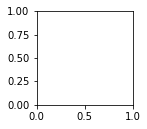

In [32]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [ ]:
import os
from argparse import ArgumentParser

import numpy as np
from PIL import Image
from skimage.transform import resize


def process_image(image_file, input_dir, output_dir):
    img = Image.open(input_dir + image_file)
    img = img.resize((256, 256))
    results = []
    results.append(img.rotate(-5))
    results.append(img.rotate(-10))
    results.append(img.rotate(+5))
    results.append(img.rotate(+10))
    for i in range(4):
        results.append(results[i].transpose(Image.FLIP_LEFT_RIGHT))
    for i in range(8):
        margin_left = np.random.randint(256 - 224)
        margin_top = np.random.randint(256 - 224)
        results.append(
            results[i].crop(
                (margin_left, margin_top, margin_left + 224, margin_top + 224)
            )
        )
    margin_left = np.random.randint(256 - 224)
    margin_top = np.random.randint(256 - 224)
    results[i] = results[i].crop(
        (margin_left, margin_top, margin_left + 224, margin_top + 224)
    )

    for i in range(16):
        results[i].save(os.path.join(output_dir, f"{image_file.split('.')[0]}_{i}.png"))

input_dir = "./sample/images/"
output_dir = "./preprocessing/images/"
os.makedirs(output_dir, exist_ok=True)
img_list = os.listdir(input_dir)
for idx, image_file in enumerate(img_list):
    process_image(image_file, input_dir, output_dir)
    
